# Importar librerías

In [1]:
# Importamos las librerías para tratamiento y visualización de datos
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importamos las librerías que necesitamos para el modelo de entrenamiento
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Importamos la librería del modelo GaussianNB que vamos a comparar
from sklearn.naive_bayes import ComplementNB


In [2]:
# Cargamos el conjunto de datos 'penguins' disponible en la librería seaborn
penguins = sns.load_dataset('penguins')
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
#Lamentablemente por falta de tiempo elimino los datos de las columnas Isla, Sexo, y body_mass_g
penguins=penguins.drop('island',axis=1)
penguins=penguins.drop('sex',axis=1)
penguins=penguins.drop('body_mass_g',axis=1)

#Limpiamos los valores "NaN" nulos
penguins=penguins.dropna()
penguins

,species,bill_length_mm,bill_depth_mm,flipper_length_mm
0,Adelie,39.1,18.7,181.0
1,Adelie,39.5,17.4,186.0
2,Adelie,40.3,18.0,195.0
4,Adelie,36.7,19.3,193.0
5,Adelie,39.3,20.6,190.0
...,...,...,...,...
338,Gentoo,47.2,13.7,214.0
340,Gentoo,46.8,14.3,215.0
341,Gentoo,50.4,15.7,222.0
342,Gentoo,45.2,14.8,212.0


In [4]:
# Visualizamos la relación entre columnas
penguins['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


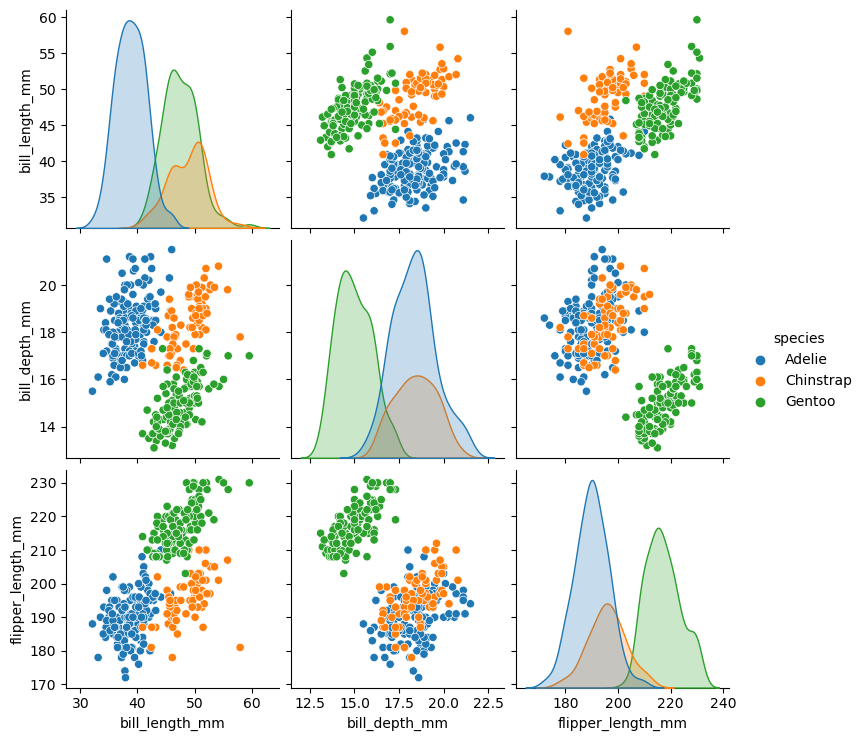

In [5]:
sns.pairplot(penguins, hue="species") # Con el parámetro hue indicamos la variable por la que se agruparán los datos
# En este gráfico de dispersión también se muestra la relación entre las variables indicadas, incluyendo un tono de color
# para la variable categórica (especies). De esta forma podemos ver la densidad de dicha variable en la relación
# a las variables numéricas que se comparan.

# ENTRENAMIENTO DEL MODELO 

In [6]:
# Separamos los datos de entrada y salida
X_penguins = penguins.drop('species', axis=1)
y_penguins = penguins['species']
display(X_penguins)


,bill_length_mm,bill_depth_mm,flipper_length_mm
0,39.1,18.7,181.0
1,39.5,17.4,186.0
2,40.3,18.0,195.0
4,36.7,19.3,193.0
5,39.3,20.6,190.0
...,...,...,...
338,47.2,13.7,214.0
340,46.8,14.3,215.0
341,50.4,15.7,222.0
342,45.2,14.8,212.0


In [7]:
# Separamos train y test
Xtrain, Xtest, ytrain, ytest = train_test_split(X_penguins, y_penguins, test_size=0.33, random_state=1)

In [8]:
# Instanciamos el modelo
model = ComplementNB()

# Entrenamiento con los datos
model.fit(Xtrain, ytrain)

ComplementNB()

In [9]:
# Predicción con nuevos datos
y_model = model.predict(Xtest)
y_model

array(['Adelie', 'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Adelie', 'Gentoo',
       'Adelie', 'Chinstrap', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie',
       'Chinstrap', 'Chinstrap', 'Gentoo', 'Adelie', 'Adelie',
       'Chinstrap', 'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo',
       'Gentoo', 'Adelie', 'Gentoo', 'Adelie', 'Gentoo', 'Gentoo',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Gentoo', 'Adelie', 'Adelie',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Gentoo', 'Chinstrap', 'Adelie',
       'Gentoo', 'Adelie', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'G

In [10]:
# Evaluación y cálculo de la precisión
accuracy_score(ytest, y_model) # Precisión del modelo


0.9734513274336283

In [11]:
# Y visualizamos la Matriz de Confusión
# y_true : dataframe -> Los valores de las clases que son ciertos (test)
# y_pred : ndarray   -> Los valores calculados de las clases después de realizar la predicción
# class  : ndarray   -> Los nombres de las clases/valores objetivos


def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                          titleSup=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    fig.suptitle(titleSup, fontsize=16, y=1, ha='center')
    return ax

In [12]:
# Transformamos variables categóricas a valores numéricos/enteros para llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
ytest_df= ytest.to_frame()
ytest_df['species'].replace(['Adelie', 'Gentoo', 'Chinstrap'],[0, 1, 2], inplace=True)
ytest_df

,species
103,0
126,0
12,0
249,1
239,1
...,...
224,1
89,0
293,1
151,0


In [13]:
# Transformamos variables categóricas a array para poder llamar a la función que pinta la matriz de confusión plot_confusion_matrix()
# Transformamos el resultado de la predicción(array) a un dataframe para transformar los valores categóricos en numéricos
y_model_df= pd.DataFrame(y_model, columns = ['species'])
y_model_df['species'].replace(['Adelie', 'Gentoo', 'Chinstrap'],[0, 1, 2], inplace=True)
# Y volvemos a transformar el dataframe a un array, que es el tipo de dato que espera la función plot_confusion_matrix()
y_model_array = y_model_df['species'].to_numpy()
y_model_array

array([0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 2, 2,
       1, 0, 0, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0,
       2, 2, 2, 0, 2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0], dtype=int64)

Confusion matrix, without normalization
[[49  0  0]
 [ 0 46  0]
 [ 2  1 15]]


<Axes: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

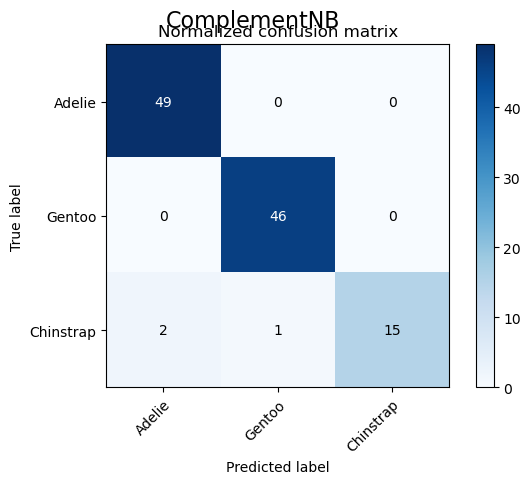

In [15]:
# Creamos este array porque es el parámetro con las clases que espera la función
clases_penguins = np.array(['Adelie', 'Gentoo', 'Chinstrap'])
plot_confusion_matrix(ytest_df['species'], y_model_array, classes=clases_penguins, normalize=False, title='Normalized confusion matrix', titleSup='ComplementNB')